In [78]:
#import all essential libraries
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.metrics import mean_squared_error,r2_score
## Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
import pandas as pd
df = pd.read_csv('SW-All (1).csv')

In [8]:
df.columns

Index(['DATE', 'BSRN', 'ND', 'KP1', 'KP2', 'KP3', 'KP4', 'KP5', 'KP6', 'KP7',
       'KP8', 'KP_SUM', 'AP1', 'AP2', 'AP3', 'AP4', 'AP5', 'AP6', 'AP7', 'AP8',
       'AP_AVG', 'CP', 'C9', 'ISN', 'F10.7_OBS', 'F10.7_ADJ',
       'F10.7_DATA_TYPE', 'F10.7_OBS_CENTER81', 'F10.7_OBS_LAST81',
       'F10.7_ADJ_CENTER81', 'F10.7_ADJ_LAST81'],
      dtype='object')

In [5]:
df.set_index('DATE')

,BSRN,ND,KP1,KP2,KP3,KP4,KP5,KP6,KP7,KP8,...,CP,C9,ISN,F10.7_OBS,F10.7_ADJ,F10.7_DATA_TYPE,F10.7_OBS_CENTER81,F10.7_OBS_LAST81,F10.7_ADJ_CENTER81,F10.7_ADJ_LAST81
DATE,,,,,,,,,,,,,,,,,,,,,
1957-10-01,1700,19,43.0,40.0,30.0,20.0,37.0,23.0,43.0,37.0,...,1.1,5.0,334,269.3,269.8,OBS,266.6,230.9,266.8,235.5
1957-10-02,1700,20,37.0,37.0,17.0,17.0,27.0,23.0,17.0,30.0,...,0.7,3.0,331,253.3,253.6,OBS,267.4,231.7,267.5,236.2
1957-10-03,1700,21,27.0,20.0,13.0,33.0,37.0,47.0,43.0,30.0,...,1.0,5.0,343,266.3,266.4,OBS,268.1,232.7,268.1,237.1
1957-10-04,1700,22,30.0,30.0,23.0,27.0,23.0,27.0,30.0,27.0,...,0.7,3.0,307,238.2,238.2,OBS,268.8,233.3,268.7,237.7
1957-10-05,1700,23,30.0,30.0,17.0,23.0,20.0,27.0,27.0,20.0,...,0.6,3.0,310,246.2,246.0,OBS,269.3,233.9,269.1,238.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041-06-01,2832,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13,69.2,71.1,PRM,69.5,71.1,71.3,71.7
2041-07-01,2833,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12,68.5,70.8,PRM,68.8,69.8,71.0,71.4
2041-08-01,2834,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11,68.4,70.5,PRM,68.7,69.0,70.6,71.1


<AxesSubplot: xlabel='DATE'>

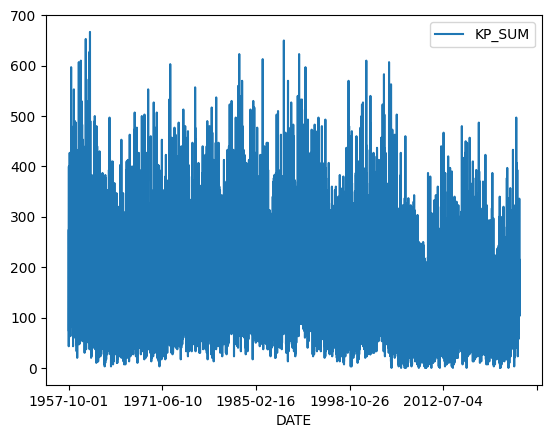

In [10]:
df.plot(x = 'DATE', y = 'KP_SUM')

In [16]:
df = df[['DATE', 'KP_SUM']]
# df.DATE = pd.to_datetime(df[['DATE']])
df.head()

,DATE,KP_SUM
0,1957-10-01,273.0
1,1957-10-02,203.0
2,1957-10-03,250.0
3,1957-10-04,217.0
4,1957-10-05,193.0


In [18]:
df.DATE = pd.to_datetime(df.DATE)

In [19]:
df

,DATE,KP_SUM
0,1957-10-01,273.0
1,1957-10-02,203.0
2,1957-10-03,250.0
3,1957-10-04,217.0
4,1957-10-05,193.0
...,...,...
24280,2041-06-01,NaN
24281,2041-07-01,NaN
24282,2041-08-01,NaN
24283,2041-09-01,NaN


In [20]:
train = df[df.DATE.dt.year<1996]
test = df[df.DATE.dt.year>=1996]



27942

In [24]:
df[df.DATE.dt.year==2021].plot(x = 'DATE', y = 'KP_SUM')
df[df.DATE.dt.year==2022].plot(x = 'DATE', y = 'KP_SUM')

KeyError: 30

In [27]:
df.dropna(inplace= True)

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('airline-passengers.csv', header=0, index_col=0)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

In [29]:

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = list(df['KP_SUM'])[:365]
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

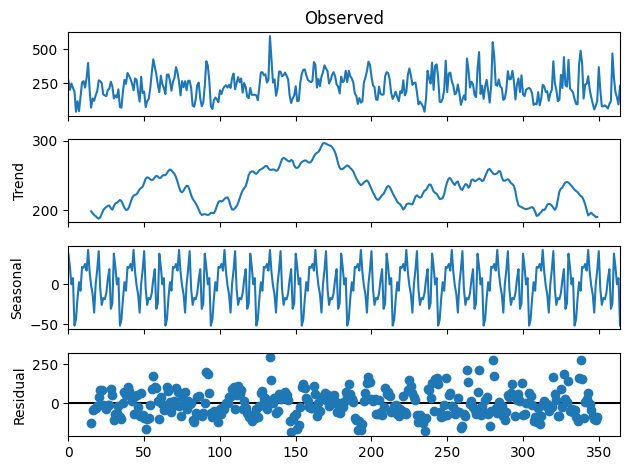

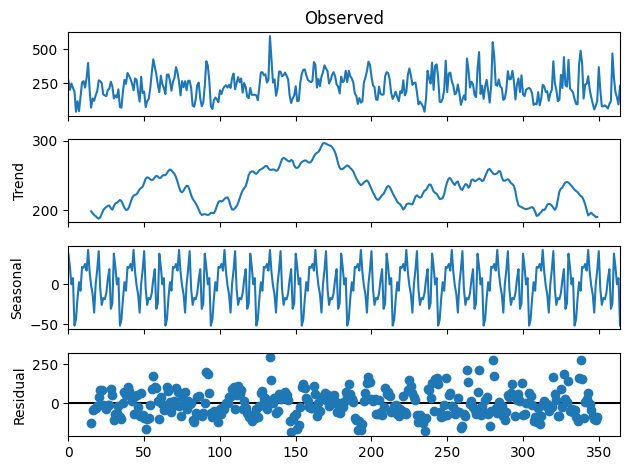

In [47]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('DATE')
result = seasonal_decompose(series, model='additive', period=30)
result.plot()

In [49]:
df

,DATE,KP_SUM
0,1957-10-01,273.0
1,1957-10-02,203.0
2,1957-10-03,250.0
3,1957-10-04,217.0
4,1957-10-05,193.0
...,...,...
24062,2023-08-18,176.0
24063,2023-08-19,104.0
24064,2023-08-20,104.0
24065,2023-08-21,104.0


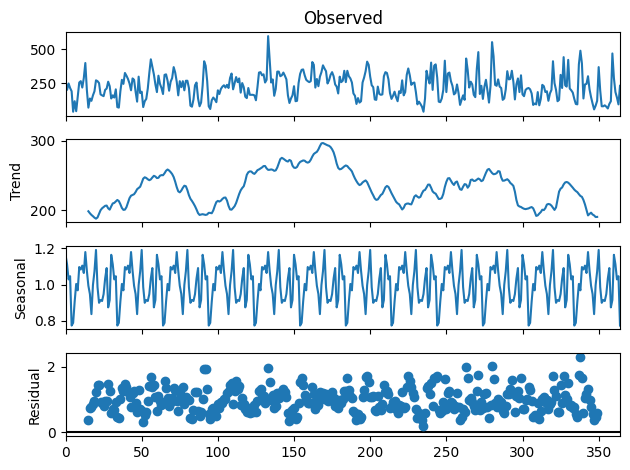

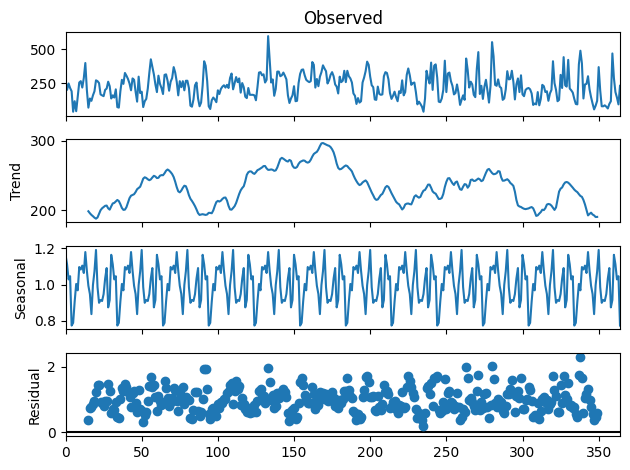

In [45]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('DATE')
result = seasonal_decompose(series, model='multiplicative', period=30)
result.plot()

In [54]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [52]:
df.set_index('DATE')

,KP_SUM
DATE,
1957-10-01,273.0
1957-10-02,203.0
1957-10-03,250.0
1957-10-04,217.0
1957-10-05,193.0
...,...
2023-08-18,176.0
2023-08-19,104.0
2023-08-20,104.0


In [103]:
data = series_to_supervised(df[['KP_SUM']], n_in = 3, n_out = 1 )

In [101]:
data = series_to_supervised(df, n_in = 3, n_out = 1 )

In [102]:
dates = data['var1(t)']

In [104]:
data['Date'] = dates

In [105]:
data = data.set_index('Date')


In [106]:
data

,var1(t-3),var1(t-2),var1(t-1),var1(t)
Date,,,,
1957-10-04,273.0,203.0,250.0,217.0
1957-10-05,203.0,250.0,217.0,193.0
1957-10-06,250.0,217.0,193.0,43.0
1957-10-07,217.0,193.0,43.0,120.0
1957-10-08,193.0,43.0,120.0,47.0
...,...,...,...,...
2023-08-18,176.0,176.0,176.0,176.0
2023-08-19,176.0,176.0,176.0,104.0
2023-08-20,176.0,176.0,104.0,104.0


In [107]:
values = data.values
train_index = int(data.shape[0]*0.80) #The logic is to have 500 days worth of training data. this could also be a hyperparameter that can be tuned.
train = values[:train_index, :]
test = values[train_index:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(19251, 1, 3) (19251,) (4813, 1, 3) (4813,)


Epoch 1/10


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


151/151 [==============================] - 7s 20ms/step - loss: 27174.7246 - val_loss: 6511.5386
Epoch 2/10
151/151 [==============================] - 2s 12ms/step - loss: 10042.0576 - val_loss: 7817.9854
Epoch 3/10
151/151 [==============================] - 2s 12ms/step - loss: 8855.3799 - val_loss: 9113.0654
Epoch 4/10
151/151 [==============================] - 2s 12ms/step - loss: 8874.9277 - val_loss: 5589.5190
Epoch 5/10
151/151 [==============================] - 2s 12ms/step - loss: 8366.9023 - val_loss: 5462.0908
Epoch 6/10
151/151 [==============================] - 2s 12ms/step - loss: 8244.9023 - val_loss: 5622.2217
Epoch 7/10
151/151 [==============================] - 2s 12ms/step - loss: 8286.6797 - val_loss: 5538.9209
Epoch 8/10
151/151 [==============================] - 2s 12ms/step - loss: 8215.7275 - val_loss: 5564.5029
Epoch 9/10
151/151 [==============================] - 2s 12ms/step - loss: 8181.0322 - val_loss: 5427.7061
Epoch 10/10
151/151 [=========================

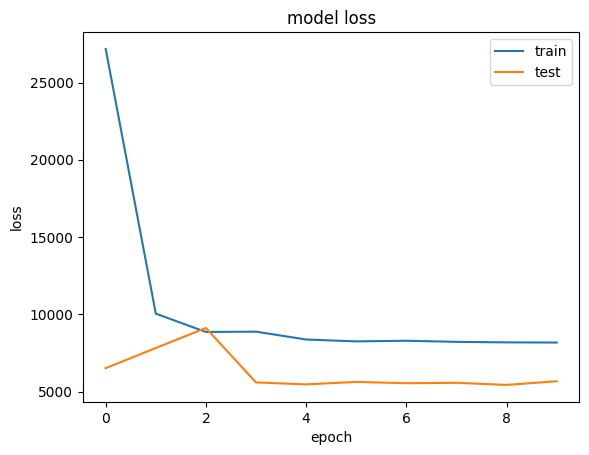

In [119]:
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
# model.add(Dense(128,  input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))
optimzer = Adam(lr = 0.001)
model.compile(loss='mean_squared_error', optimizer=optimzer)
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=128, validation_data=(test_X, test_y), verbose=1, shuffle=False)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [120]:
yhat = model.predict(test_X, verbose=0)
rmse = np.sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 75.278


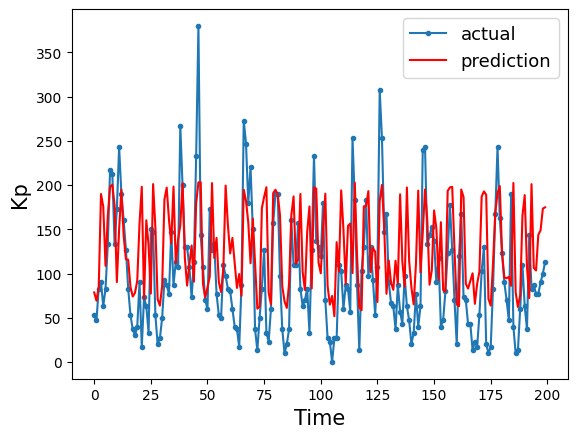

In [123]:
aa=[x for x in range(200)]
plt.plot(aa, test_y[:200], marker='.', label="actual")
plt.plot(aa, yhat[:200], 'r', label="prediction")
plt.ylabel('Kp', size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=13)
plt.show()